In [116]:
import pandas as pd

In [117]:
base = pd.read_excel(r'C:\Users\MARCOSVINICIUS\Documents\Aulas Pós\SAD\baseCefaleia5000_2.xlsx')

In [118]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 43 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Idade                                                            5000 non-null   int64 
 1   Genero                                                           5000 non-null   object
 2   Tempo de Dor                                                     5000 non-null   int64 
 3   Localizacao                                                      5000 non-null   int64 
 4   Carater                                                          5000 non-null   int64 
 5   Intensidade                                                      5000 non-null   int64 
 6   Exacerbação                                                      5000 non-null   int64 
 7   Náuseas                                            

In [178]:
df = base 
df['CelfaleiaSimNao'] = 0
df['CelfaleiaTipo1SimNao'] = 0 #Sem Aurea 
df['CelfaleiaTipo2SimNao'] = 0 #Com Aurea
df['Celfaleia2TiposSimNao'] = 0 #Dois tipos

In [179]:
print(df['CelfaleiaTipo1SimNao'].value_counts())
print(df['CelfaleiaTipo2SimNao'].value_counts())
print(df['CelfaleiaSimNao'].value_counts())
print(df['Celfaleia2TiposSimNao'].value_counts())

0    5000
Name: CelfaleiaTipo1SimNao, dtype: int64
0    5000
Name: CelfaleiaTipo2SimNao, dtype: int64
0    5000
Name: CelfaleiaSimNao, dtype: int64
0    5000
Name: Celfaleia2TiposSimNao, dtype: int64


In [180]:
#Aplicando o Critério do Livro para Cefaleia Comum Sem Aurea
df.loc[
    (df['Tempo de Dor'] >= 240 ) & 
    (
        (df['Localizacao'] == 1) |  
        (df['Carater'] == 1) | 
        (df['Exacerbação'] == 1) | 
        (df['Intensidade'].isin([2,3])
    )) & 
    (
        (df['Náuseas'] == 1) | 
        (df['Fotofobia'] == 1)
    ), 
 'CelfaleiaTipo1SimNao'] = 1
 
#Aplicando o Critério do Livro para Cefaleia Cássica Com Aurea
df.loc[ 
    (df['Aura alastra-se gradualmente por 5 min ou mais'] == 1) &
    (
        (df['Tempo Aura visual']).between(5, 60, inclusive=False) | 
        (df['Tempo Aura Sensorial']).between(5, 60, inclusive=False) |
        (df['Tempo Aura Fala Linguagem']).between(5, 60, inclusive=False) |
        (df['Tempo Aura Motor']).between(5, 60, inclusive=False) |
        (df['Tempo Aura Tronco Cerebral']).between(5, 50, inclusive=False) | 
        (df['Tempo Aura Retiniano']).between(5, 60, inclusive=False)  
    ) & 
    (
        (df['Aura Unilateral'] == 1) | 
        (df['Aura Positivo'] == 1) | (df['Cefaleia'] == 1) |
        (df['Cefaleia acompanhada dentro de 60 min'] == 1)
    ),
'CelfaleiaTipo2SimNao'] = 1

#Se Qualquer dos indicadores forem verdadeiro , está caracterizada a cefaleia 
df.loc[(df['CelfaleiaTipo1SimNao'] == 1) | (df['CelfaleiaTipo2SimNao'] == 1)  , 'CelfaleiaSimNao'] = 1

#Avaliando Possibilidade de ser
df.loc[(df['CelfaleiaTipo1SimNao'] == 1) & (df['CelfaleiaTipo2SimNao'] == 1)  , 'Celfaleia2TiposSimNao'] = 1

In [181]:
print(df['CelfaleiaTipo1SimNao'].value_counts())
print(df['CelfaleiaTipo2SimNao'].value_counts())
print(df['CelfaleiaSimNao'].value_counts())
print(df['Celfaleia2TiposSimNao'].value_counts())


0    3184
1    1816
Name: CelfaleiaTipo1SimNao, dtype: int64
0    3231
1    1769
Name: CelfaleiaTipo2SimNao, dtype: int64
1    2951
0    2049
Name: CelfaleiaSimNao, dtype: int64
0    4366
1     634
Name: Celfaleia2TiposSimNao, dtype: int64


In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Number of patients diagnosed with liver disease:  2049
Number of patients not diagnosed with liver disease:  2951


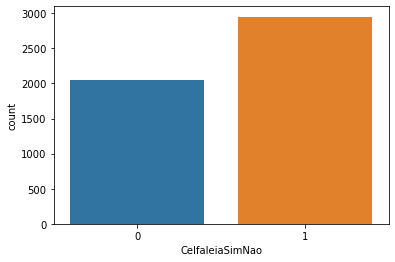

In [177]:
sns.countplot(data=df, x = 'CelfaleiaSimNao', label='Count')

NLD,LD = df['CelfaleiaSimNao'].value_counts()

print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients diagnosed with liver disease:  1816
Number of patients not diagnosed with liver disease:  3184


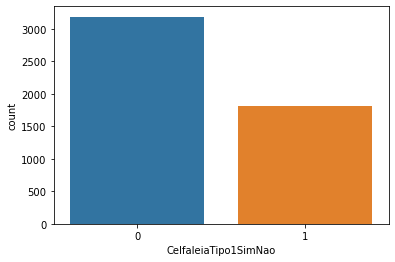

In [185]:
sns.countplot(data=df, x = 'CelfaleiaTipo1SimNao', label='Count')

NLD,LD = df['CelfaleiaTipo1SimNao'].value_counts()

print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients diagnosed with liver disease:  1769
Number of patients not diagnosed with liver disease:  3231


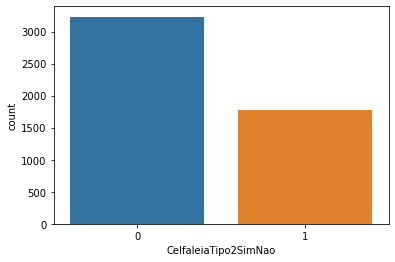

In [186]:
sns.countplot(data=df, x = 'CelfaleiaTipo2SimNao', label='Count')

NLD,LD = df['CelfaleiaTipo2SimNao'].value_counts()

print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients diagnosed with liver disease:  634
Number of patients not diagnosed with liver disease:  4366


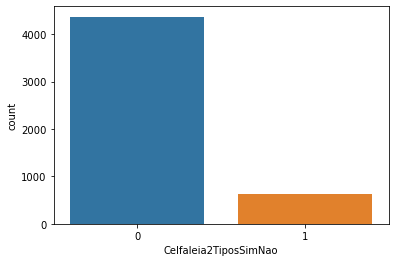

In [206]:
sns.countplot(data=df, x = 'Celfaleia2TiposSimNao', label='Count')

NLD,LD = df['Celfaleia2TiposSimNao'].value_counts()

print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  2534
Number of patients that are female:  2466


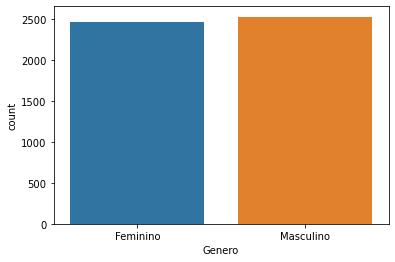

In [188]:
%matplotlib inline
sns.countplot(data=df, x = 'Genero', label='Count')

M, F = df['Genero'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

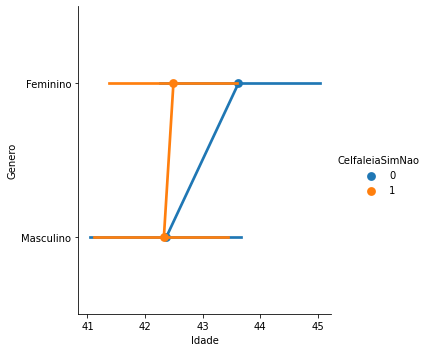

In [189]:
sns.factorplot(x="Idade", y="Genero", hue="CelfaleiaSimNao", data=df)

In [190]:
df[['Genero', 'CelfaleiaSimNao','Idade']].groupby(['CelfaleiaSimNao','Genero'], as_index=False).count().sort_values(by='CelfaleiaSimNao', ascending=False)

,CelfaleiaSimNao,Genero,Idade
2,1,Feminino,1484
3,1,Masculino,1467
0,0,Feminino,982
1,0,Masculino,1067


In [191]:
df[['Genero', 'CelfaleiaTipo1SimNao','Idade']].groupby(['CelfaleiaTipo1SimNao','Genero'], as_index=False).count().sort_values(by='CelfaleiaTipo1SimNao', ascending=False)

,CelfaleiaTipo1SimNao,Genero,Idade
2,1,Feminino,906
3,1,Masculino,910
0,0,Feminino,1560
1,0,Masculino,1624


In [192]:
df[['Genero', 'CelfaleiaTipo2SimNao','Idade']].groupby(['CelfaleiaTipo2SimNao','Genero'], as_index=False).count().sort_values(by='CelfaleiaTipo2SimNao', ascending=False)

,CelfaleiaTipo2SimNao,Genero,Idade
2,1,Feminino,899
3,1,Masculino,870
0,0,Feminino,1567
1,0,Masculino,1664


In [193]:
df[['Genero', 'Celfaleia2TiposSimNao','Idade']].groupby(['Celfaleia2TiposSimNao','Genero'], as_index=False).count().sort_values(by='Celfaleia2TiposSimNao', ascending=False)

,Celfaleia2TiposSimNao,Genero,Idade
2,1,Feminino,321
3,1,Masculino,313
0,0,Feminino,2145
1,0,Masculino,2221


In [200]:

print(df[['Genero', 'CelfaleiaSimNao','Idade']].groupby(['CelfaleiaSimNao','Genero'], as_index=False).mean().sort_values(by='CelfaleiaSimNao', ascending=False))

print(df[['Genero', 'CelfaleiaTipo1SimNao','Idade']].groupby(['CelfaleiaTipo1SimNao','Genero'], as_index=False).mean().sort_values(by='CelfaleiaTipo1SimNao', ascending=False))

print(df[['Genero', 'CelfaleiaTipo2SimNao','Idade']].groupby(['CelfaleiaTipo2SimNao','Genero'], as_index=False).mean().sort_values(by='CelfaleiaTipo2SimNao', ascending=False))

print(df[['Genero', 'Celfaleia2TiposSimNao','Idade']].groupby(['Celfaleia2TiposSimNao','Genero'], as_index=False).mean().sort_values(by='Celfaleia2TiposSimNao', ascending=False))




   CelfaleiaSimNao     Genero      Idade
2                1   Feminino  42.491914
3                1  Masculino  42.326517
0                0   Feminino  43.621181
1                0  Masculino  42.369260
   CelfaleiaTipo1SimNao     Genero      Idade
2                     1   Feminino  42.583885
3                     1  Masculino  42.287912
0                     0   Feminino  43.149359
1                     0  Masculino  42.376232
   CelfaleiaTipo2SimNao     Genero      Idade
2                     1   Feminino  42.322581
3                     1  Masculino  43.004598
0                     0   Feminino  43.296745
1                     0  Masculino  41.999399
   Celfaleia2TiposSimNao     Genero      Idade
2                      1   Feminino  42.277259
3                      1  Masculino  44.099042
0                      0   Feminino  43.041026
1                      0  Masculino  42.097253


Text(0.5, 0.98, 'Cefaleia by Gender and Age')

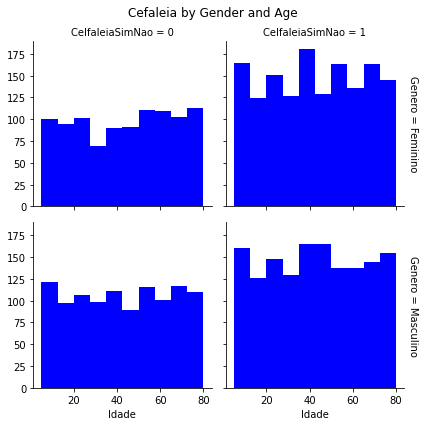

In [201]:
g = sns.FacetGrid(df, col="CelfaleiaSimNao", row="Genero", margin_titles=True)
g.map(plt.hist, "Idade", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Cefaleia by Gender and Age')

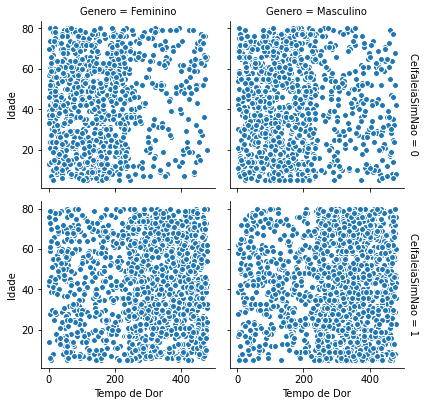

In [202]:
g = sns.FacetGrid(df, col="Genero", row="CelfaleiaSimNao", margin_titles=True)
g.map(plt.scatter,"Tempo de Dor", "Idade", edgecolor="w")
plt.subplots_adjust(top=0.9)

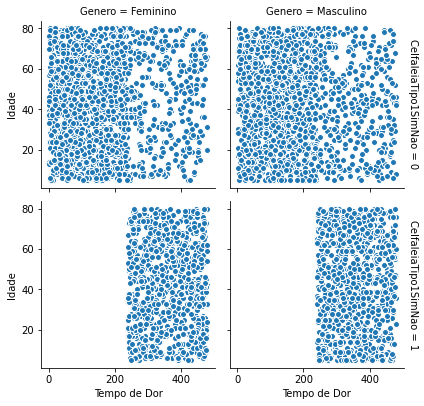

In [207]:
g = sns.FacetGrid(df, col="Genero", row="CelfaleiaTipo1SimNao", margin_titles=True)
g.map(plt.scatter,"Tempo de Dor", "Idade", edgecolor="w")
plt.subplots_adjust(top=0.9)

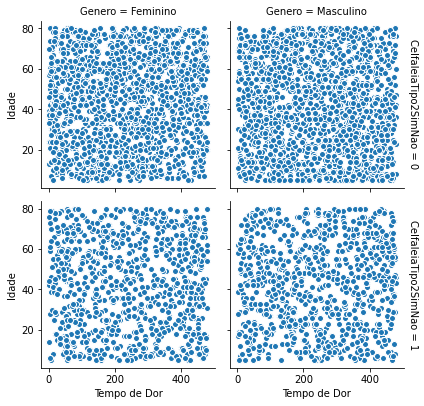

In [208]:
g = sns.FacetGrid(df, col="Genero", row="CelfaleiaTipo2SimNao", margin_titles=True)
g.map(plt.scatter,"Tempo de Dor", "Idade", edgecolor="w")
plt.subplots_adjust(top=0.9)

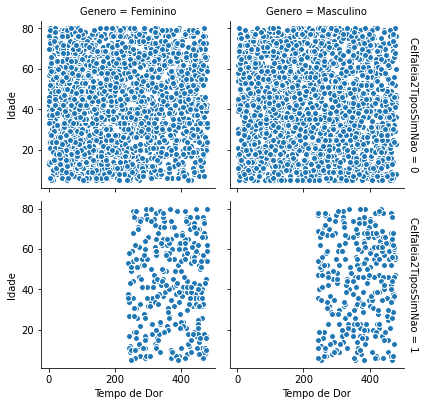

In [209]:
g = sns.FacetGrid(df, col="Genero", row="Celfaleia2TiposSimNao", margin_titles=True)
g.map(plt.scatter,"Tempo de Dor", "Idade", edgecolor="w")
plt.subplots_adjust(top=0.9)